# Questions 


#### 1 -What is a Multi-Layer Perceptron (MLP) and how does it differ from a single-layer perceptron?

#### 2- Explain the architecture of a Multi-Layer Perceptron (MLP) and the role of input, hidden, and output layers.


#### 3- How are weights initialized in a Multi-Layer Perceptron (MLP) and why is it important?

#### 4- What is the purpose of activation functions in a Multi-Layer Perceptron (MLP)? Name some commonly used activation functions.

#### 5- What is backpropagation and how is it used to train a Multi-Layer Perceptron (MLP)


#### 6- How do you choose the number of hidden layers and neurons in each layer of a Multi-Layer Perceptron (MLP)?




# Load MNIST Dataset and build a Deep Learning Model.

### Things to be done:
    1- Load the MNIST Data
    2- Divide the data into train and test sets
    3- Plot the first 10 images using imshow()
    4- Convert images to categorical format
    5- Create a sequential model
    6- Plot the model summary
    7- Plot the architecture of the model with its layer shapes
    8- Compile the model
    9- Fit the model with 20 epochs (as per your desktop configuration)
    10- Plot Training and Testing Loss
    11- Save the model in .h5 extension
    12- Load the model
    13- Test the model

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import to_categorical, plot_model

In [4]:
data = mnist.load_data()
data[:5]

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(X_train, y_train), (X_test, y_test) = data

In [6]:
print(f"Shape of X_train -> {X_train.shape}")
print(f"Shape of y_train -> {y_train.shape}")
print(f"Shape of X_test -> {X_test.shape}")
print(f"Shape of y_test -> {y_test.shape}")

Shape of X_train -> (60000, 28, 28)
Shape of y_train -> (60000,)
Shape of X_test -> (10000, 28, 28)
Shape of y_test -> (10000,)


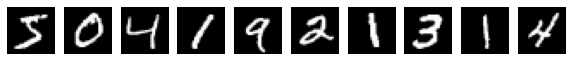

In [7]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\users\gitanshu\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Epoch 1/20
300/300 - 4s - 13ms/step - accuracy: 0.8899 - loss: 0.3889 - val_accuracy: 0.9482 - val_loss: 0.1777
Epoch 2/20
300/300 - 1s - 4ms/step - accuracy: 0.9561 - loss: 0.1521 - val_accuracy: 0.9629 - val_loss: 0.1275
Epoch 3/20
300/300 - 1s - 5ms/step - accuracy: 0.9682 - loss: 0.1093 - val_accuracy: 0.9665 - val_loss: 0.1158
Epoch 4/20
300/300 - 1s - 4ms/step - accuracy: 0.9752 - loss: 0.0848 - val_accuracy: 0.9722 - val_loss: 0.0903
Epoch 5/20
300/300 - 1s - 4ms/step - accuracy: 0.9801 - loss: 0.0682 - val_accuracy: 0.9727 - val_loss: 0.0881
Epoch 6/20
300/300 - 1s - 5ms/step - accuracy: 0.9835 - loss: 0.0563 - val_accuracy: 0.9751 - val_loss: 0.0854
Epoch 7/20
300/300 - 1s - 5ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9750 - val_loss: 0.0829
Epoch 8/20
300/300 - 1s - 4ms/step - accuracy: 0.9883 - loss: 0.0393 - val_accuracy: 0.9758 - val_loss: 0.0757
Epoch 9/20
300/300 - 1s - 4ms/step - accuracy: 0.9905 - loss: 0.0326 - val_accuracy: 0.9767 - val_loss: 0.0849


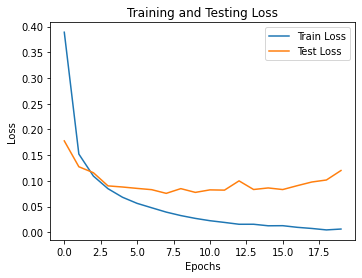

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

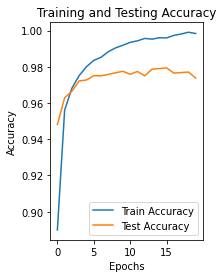

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model.save('mnist_model.h5')

In [19]:
loaded_model = load_model('mnist_model.h5')

In [21]:
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {round(loss,2)}, Test Accuracy: {round(accuracy,2)}')

Test Loss: 0.12, Test Accuracy: 0.97
